<a href="https://colab.research.google.com/github/Haramiday/ECX-Internship/blob/master/My_final_first_ml_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [6]:
#reading the file
my_h =pd.read_csv('heart.csv')

In [7]:
my_h.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
my_h.shape

(303, 14)

In [9]:
#checking if there are nan values in the table
my_h.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#finding the correlation
abs(my_h.corr())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
cp,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
trestbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210,0.144931
chol,0.213678,0.197912,0.076904,0.123174,1.000000,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019,0.028046
restecg,0.116211,0.058196,0.044421,0.114103,0.151040,0.084189,1.000000,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981,0.137230
thalach,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
exang,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696


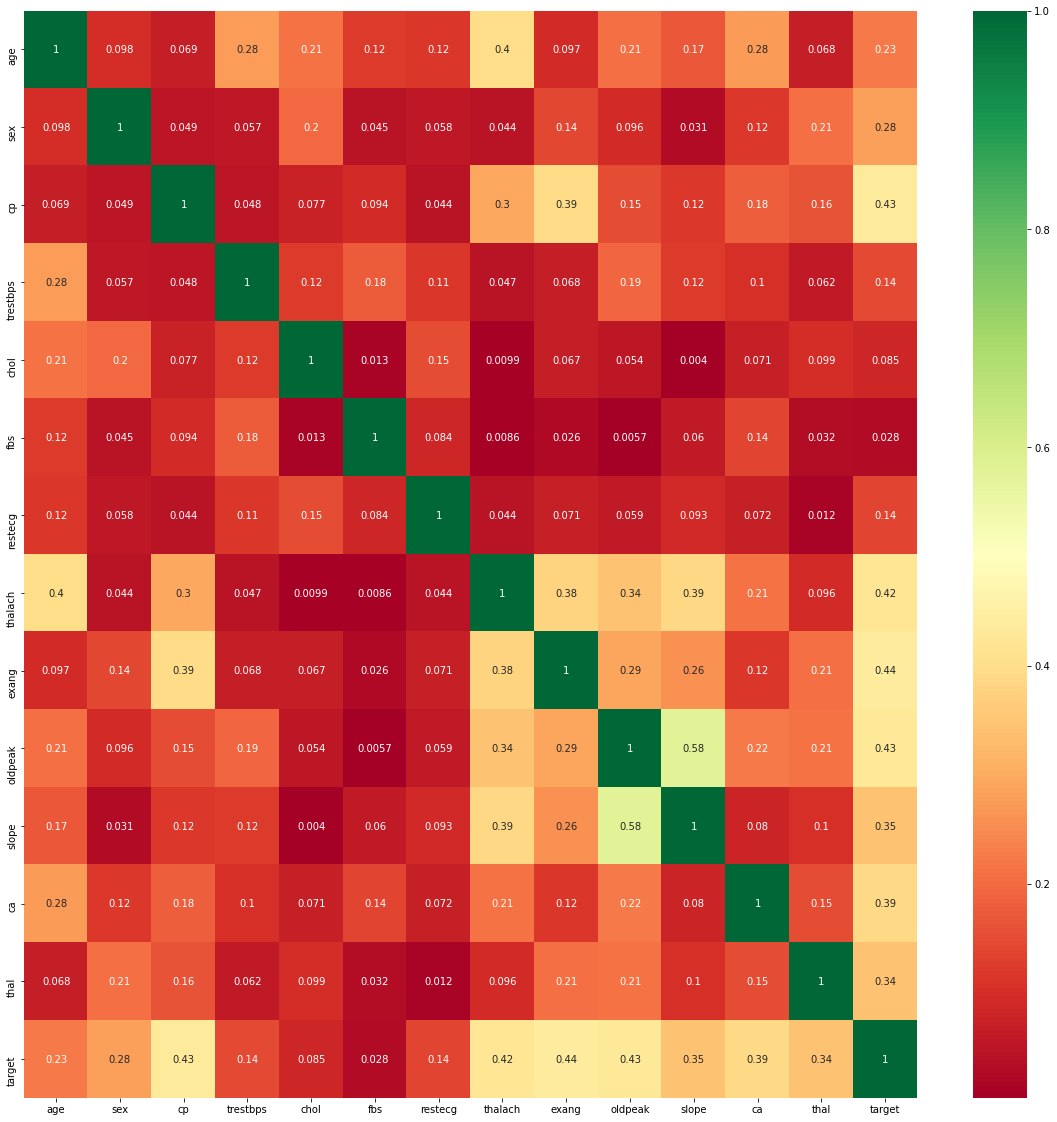

In [11]:
#heatmap
corrmat = abs(my_h.corr())
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(abs(my_h[top_corr_feature].corr()),annot=True,cmap="RdYlGn")

EDA
    With the heatmap, i saw for features which are of great importance to the target feature.These features were cp,thalach,exang and oldpeak. This implies that people with heart diseases most likely have chest pain,maximum heart rate, exercise induced anginahh, and high ST depression induced by exercise relative to rest.

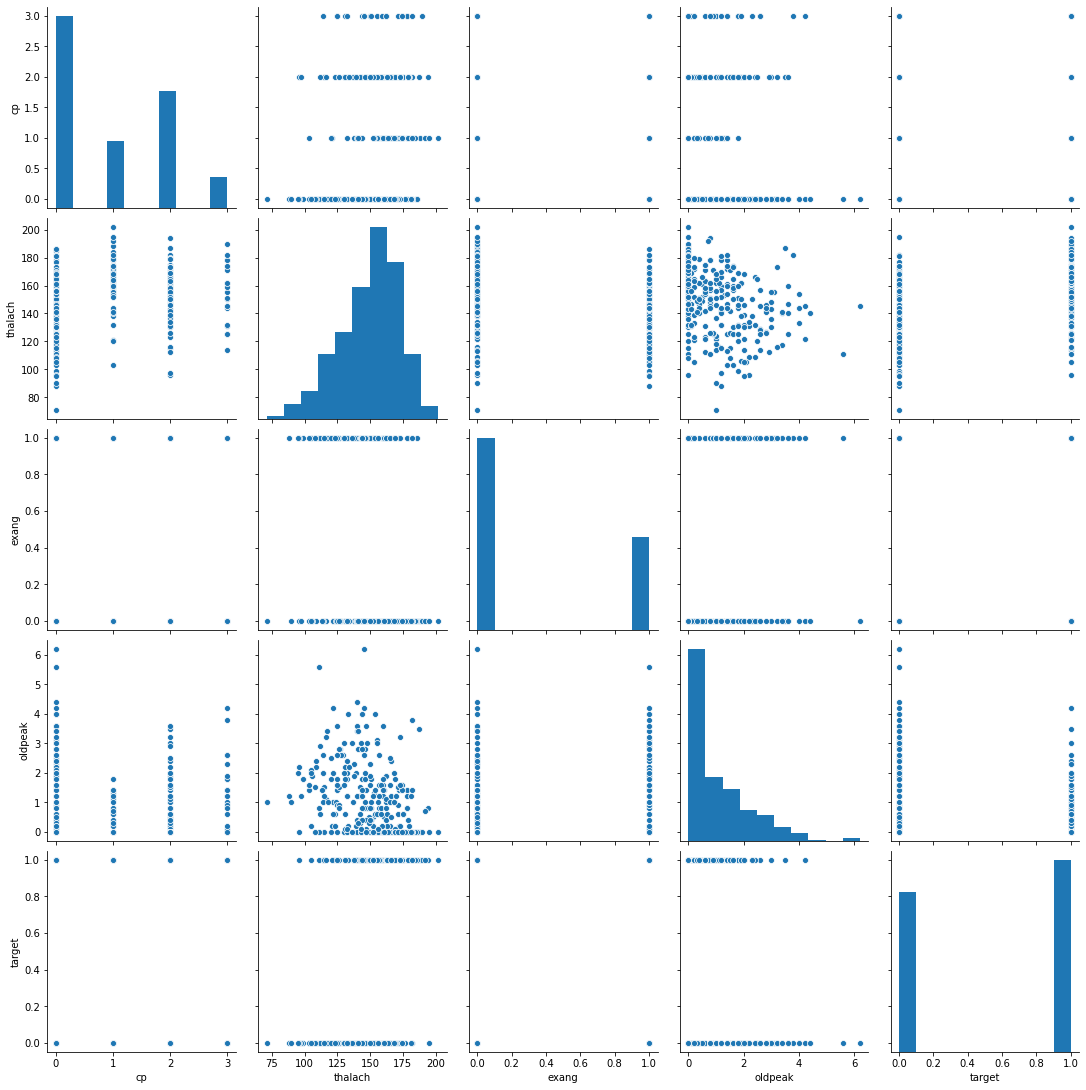

In [12]:
g = sns.pairplot(my_h, height=3, vars=["cp", "thalach",'exang','oldpeak','target'])

EDA
This paiplot shows that oldpeak and thalach are better causes of the target features

In [13]:
X_clf=my_h.iloc[:,1:13] #other features 
y_clf=my_h.iloc[:,13] #the target 

In [14]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2
X_clf_new=SelectKBest(score_func=chi2,k=2).fit_transform(X_clf,y_clf)

In [15]:
print(X_clf_new[:5]) #printing the best two features for my model

[[150.    2.3]
 [187.    3.5]
 [172.    1.4]
 [178.    0.8]
 [163.    0.6]]


The result better confirms the result from the pairplot

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
#splitting into train and test data
X = my_h[['thalach','oldpeak']]
y = my_h['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
lf = RandomForestClassifier(n_estimators=1000,random_state=100)
lf.fit(X,y)
pred = lf.predict(X_test)

#accuracy
print(metrics.accuracy_score(y_test,pred))

0.9605263157894737
